In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the cleaned data into a DataFrame
df = pd.read_csv('cleaned_yt_data.csv')

In [3]:
# Display the first few rows of the DataFrame to inspect the data
df.head()

,Video ID,Title,Description,View Count,Like Count,Comment Count,Upload Date,Channel Name,Comment,comment_author,Processed_Description,Processed_Title,Processed_Comment,Original_Length,Processed_Length
0,PMz5yIzPHjo,The stages of F.I.R.E. (Financial Independence...,There are many paths that can lead to success ...,17711,616,87,2023-06-25 22:04:28+00:00,Dividend Growth Investing,Which stage are you working towards?\r\nTry M1...,Dividend Growth Investing,many path lead success pursuing financial inde...,stage financial independence retire early,stage working towards try m1 finance http tran...,203,120
1,7kE2_0Qa2MY,The Dark Side of F.I.R.E. (Financial Independe...,The idea of early retirement has captured the ...,24697,538,55,2023-09-23 17:00:05+00:00,"James Conole, CFP®",There are no downsides. The less I have to wor...,THEDEERKING,idea early retirement captured attention many ...,dark side financial independence retire early,downside le work man better life look forward ...,568,306
2,-dXXWFDZdt8,How We Retired Early With $540K At 40 In Colorado,"In 2012, Debbie Emick received a series of tro...",318490,4014,881,2022-11-16 16:00:01+00:00,CNBC Make It,Biggest financial mistake I ever made was with...,Laura Romo,debbie emick received series troubling diagnos...,retired early 540k colorado,biggest financial mistake ever made 401k compa...,177,99
3,k2wbW5SwgDM,Why the FIRE Movement doesn't work (Financial ...,Ex-Google TechLead on the FIRE movement.\nJoin...,235469,7588,1190,2022-10-06 21:51:00+00:00,TechLead,Join me in DeFi Pro and make passive income wi...,TechLead,techlead fire movement join defi pro passive i...,fire movement work financial independence reti...,join defi pro passive income crypto http,103,58
4,PPMADrd5f4k,How to Retire As Early As Possible (Starting f...,How we can reach financial independence and re...,94816,2919,343,2023-09-06 18:00:19+00:00,Humphrey Yang,Is there such a thing as an addiction to readi...,Shai Lee,reach financial independence retire earlier kn...,retire early possible starting,thing addiction reading posting scammer fascin...,252,125


# Basic Data Analysis

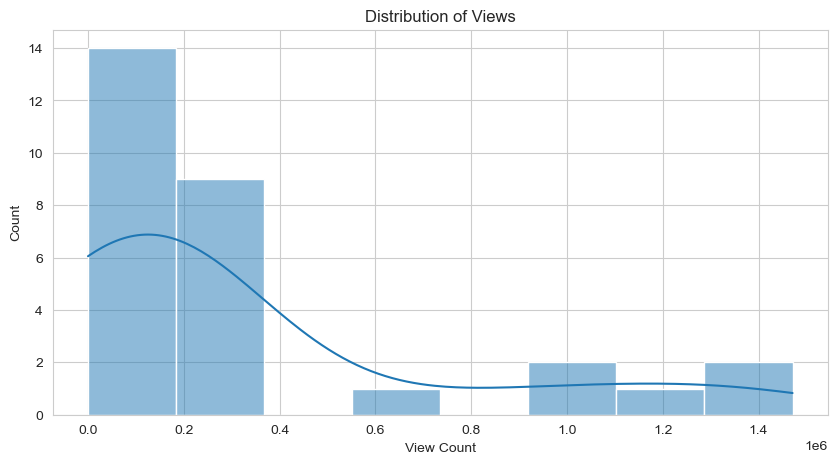

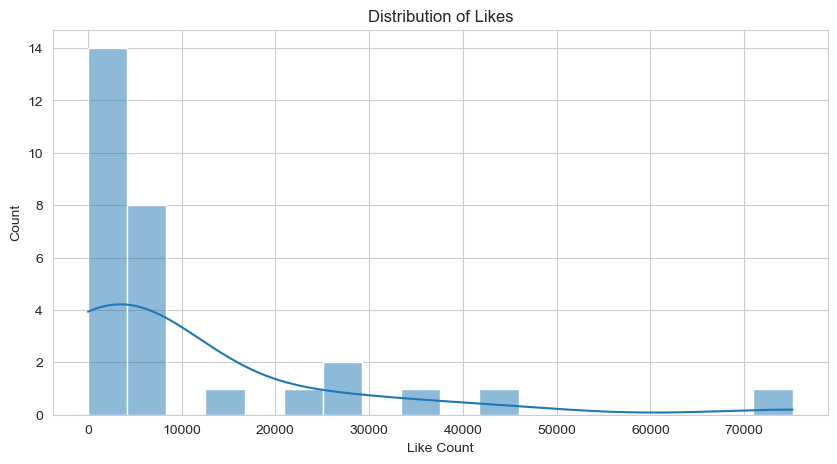

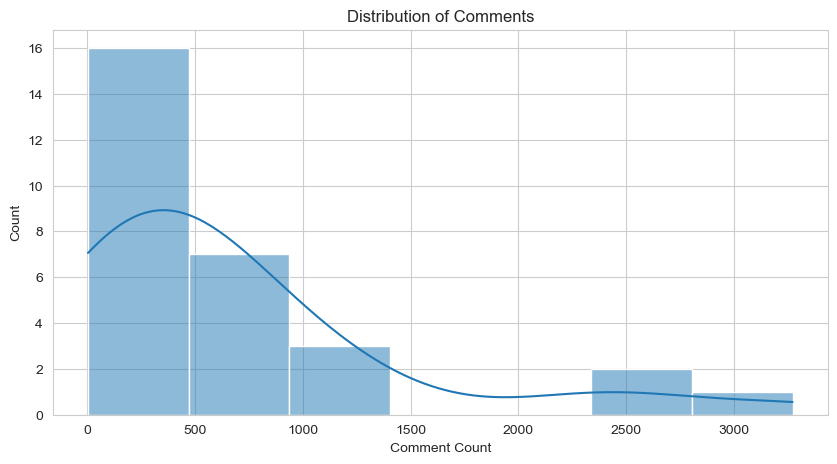

In [4]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting distribution of views
plt.figure(figsize=(10, 5))
sns.histplot(df['View Count'], kde=True)
plt.title('Distribution of Views')
plt.show()

# Plotting distribution of likes
plt.figure(figsize=(10, 5))
sns.histplot(df['Like Count'], kde=True)
plt.title('Distribution of Likes')
plt.show()

# Plotting distribution of comments
plt.figure(figsize=(10, 5))
sns.histplot(df['Comment Count'], kde=True)
plt.title('Distribution of Comments')
plt.show()

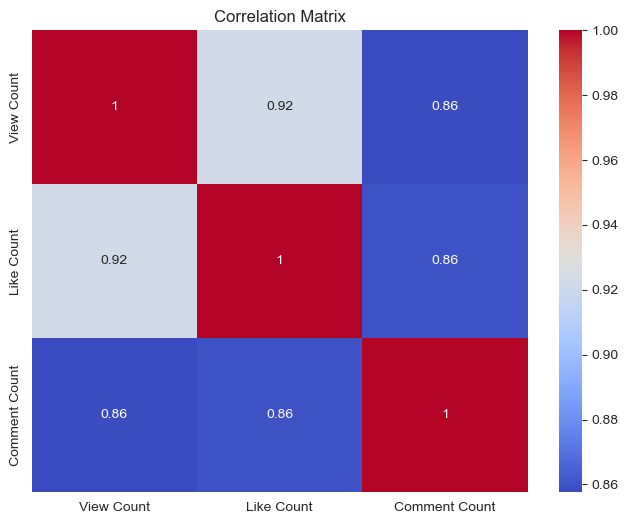

In [5]:
# Visualizing the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['View Count', 'Like Count', 'Comment Count']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

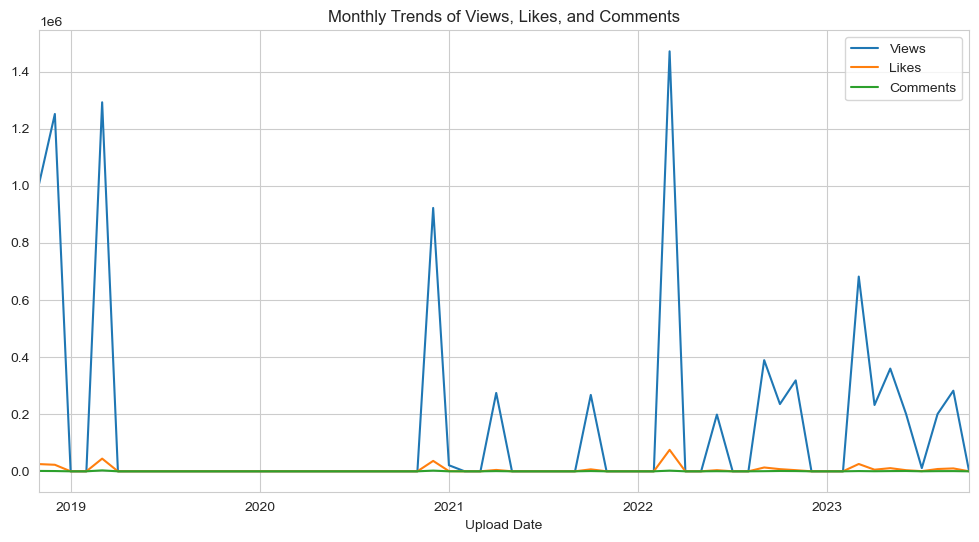

In [6]:
#Time series Analysis

# Grouping data by month and calculating the sum of views, likes, and comments for each month
df['Upload Date'] = pd.to_datetime(df['Upload Date'])  # Ensuring the date is in datetime format
monthly_data = df.resample('M', on='Upload Date').sum()

# Plotting time series of views, likes, and comments
plt.figure(figsize=(12, 6))
monthly_data['View Count'].plot(label='Views', legend=True)
monthly_data['Like Count'].plot(label='Likes', legend=True)
monthly_data['Comment Count'].plot(label='Comments', legend=True)
plt.title('Monthly Trends of Views, Likes, and Comments')
plt.show()

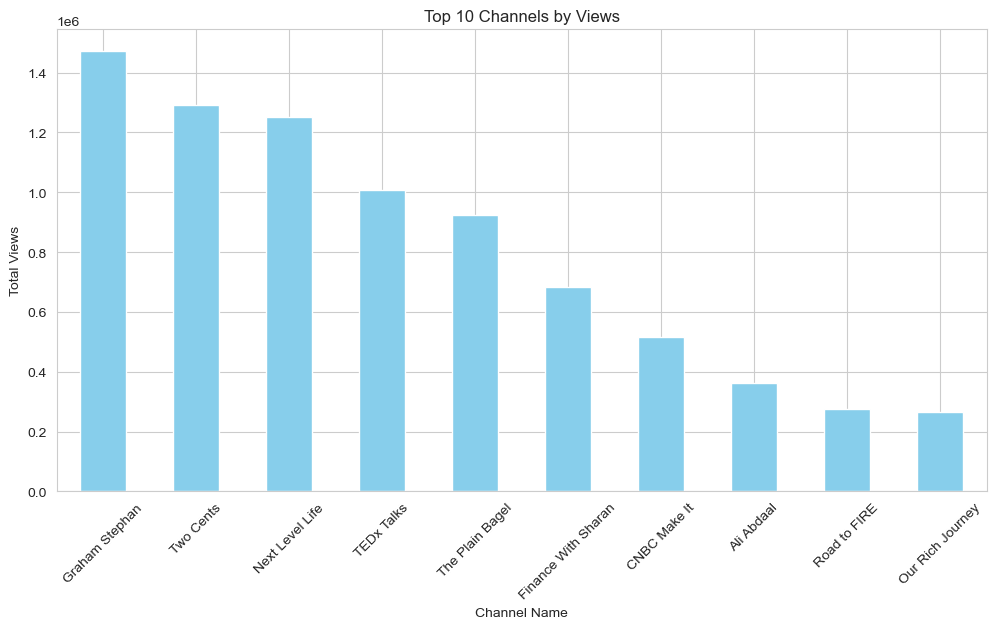

In [7]:
#Channel Analysis

# Top 10 channels by total views
top_channels_by_views = df.groupby('Channel Name')['View Count'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_channels_by_views.plot(kind='bar', color='skyblue')
plt.title('Top 10 Channels by Views')
plt.ylabel('Total Views')
plt.xlabel('Channel Name')
plt.xticks(rotation=45)
plt.show()

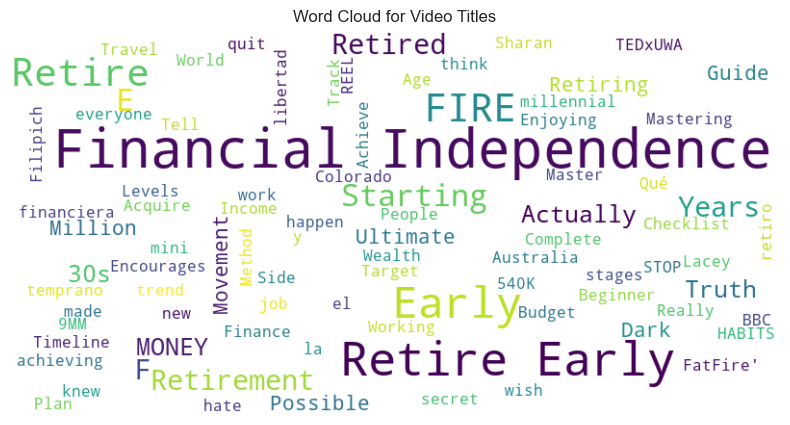

In [8]:
from wordcloud import WordCloud

# Creating a word cloud for video titles
title_words = ' '.join(df['Title'].astype(str))
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(title_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Video Titles')
plt.show()

# Sentiment Analysis

In [9]:
#Distribution of comment sentiments

import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Compute sentiment scores
df['Sentiment_Score'] = df['Comment'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Categorize sentiment as positive, neutral, or negative
df['Sentiment'] = df['Sentiment_Score'].apply(lambda x: 'positive' if x > 0.05 else ('neutral' if -0.05 <= x <= 0.05 else 'negative'))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/swetakarmacharya/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


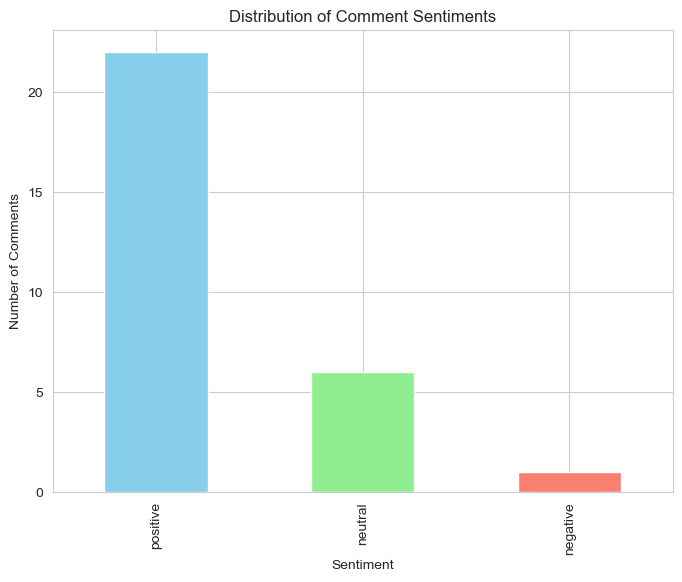

In [10]:
plt.figure(figsize=(8, 6))
df['Sentiment'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Distribution of Comment Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

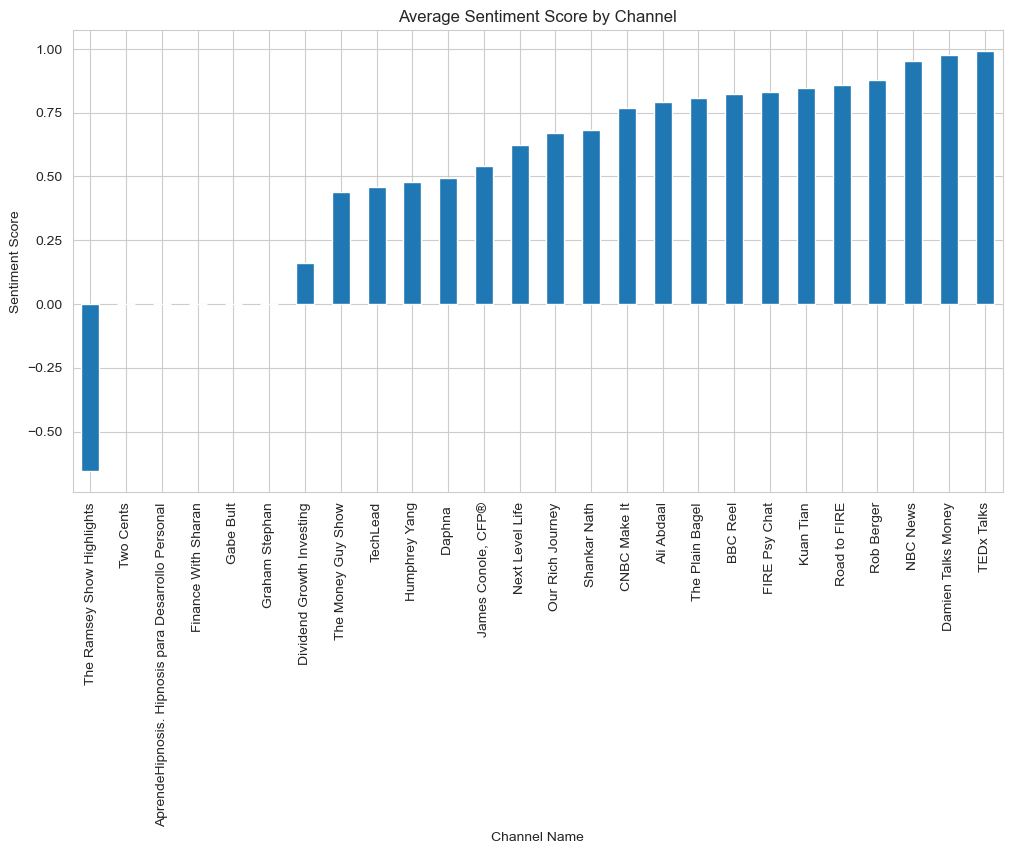

In [11]:
#Channel-wise sentiment analysis

channel_sentiment = df.groupby('Channel Name')['Sentiment_Score'].mean().sort_values()

plt.figure(figsize=(12, 6))
channel_sentiment.plot(kind='bar')
plt.title('Average Sentiment Score by Channel')
plt.ylabel('Sentiment Score')
plt.xlabel('Channel Name')
plt.show()

# Further Analysis

In [12]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [13]:
from tabulate import tabulate

# Top 10 videos based on views
top_views = df.sort_values(by='View Count', ascending=False).head(10)

# Top 10 videos based on likes
top_likes = df.sort_values(by='Like Count', ascending=False).head(10)

# Top 10 videos based on comments
top_comments = df.sort_values(by='Comment Count', ascending=False).head(10)

def split_title(title, max_length=50):
    """Split title roughly in the middle."""
    if len(title) <= max_length:
        return title
    # Find the nearest space to the middle
    split_idx = title[:max_length].rfind(" ")
    return title[:split_idx] + "\n" + title[split_idx+1:]

# Apply the function to the Title column of top_views
top_views['Title'] = top_views['Title'].apply(split_title)
top_likes['Title'] = top_views['Title'].apply(split_title)
top_comments['Title'] = top_views['Title'].apply(split_title)

# Now, use tabulate to print the table
headers = ["Video ID", "Title", "View Count"]

Top 10 Videos Based on Views
+-------------+---------------------------------------------------+--------------+
| Video ID    | Title                                             |   View Count |
+=============+===================================================+==============+
| -glfrfDLLTs | How To Retire In 10 Years (Starting With $0)      |      1470850 |
+-------------+---------------------------------------------------+--------------+
| 8si7cqw9wm0 | Can You Really Retire in Your 30s?                |      1292359 |
+-------------+---------------------------------------------------+--------------+
| kDSHHiFMJ_I | 10 Levels of Financial Independence And Early     |      1251381 |
|             | Retirement | How to Retire Early                  |              |
+-------------+---------------------------------------------------+--------------+
| XSHNDyinZSQ | Why you should think about financial independence |      1007369 |
|             | and mini-retirements | Lacey Filipich | TE

In [14]:
# Calculate the engagement rate
df['Engagement Rate'] = (df['Like Count'] + df['Comment Count']) / df['View Count']

# Function to split the text into 2-3 lines
def split_text(text, line_length=30):
    words = text.split()
    lines = []
    line = ""
    for word in words:
        if len(line + word) > line_length:
            lines.append(line.strip())
            line = ""
        line += word + " "
    lines.append(line.strip())
    return "\n".join(lines)

# Apply split function to 'Title' and 'Channel Name'
df['Title'] = df['Title'].apply(split_text)
df['Channel Name'] = df['Channel Name'].apply(split_text)

# Display the top engagement table using tabulate
from tabulate import tabulate
top_engagement = df.sort_values(by='Engagement Rate', ascending=False).head(10)
data = top_engagement[['Channel Name', 'Video ID', 'Title', 'Engagement Rate']]
print(tabulate(data, headers='keys', tablefmt='grid', showindex=False))


+--------------------------------+-------------+--------------------------------+-------------------+
| Channel Name                   | Video ID    | Title                          |   Engagement Rate |
+================================+=============+================================+===================+
| AprendeHipnosis. Hipnosis para | b_rOkt0sIH8 | ¿Qué es la libertad financiera |         0.168142  |
| Desarrollo Personal            |             | y el retiro temprano? F.I.R.E. |                   |
|                                |             | (Financial Independence Retire |                   |
|                                |             | Early)                         |                   |
+--------------------------------+-------------+--------------------------------+-------------------+
| Dividend Growth Investing      | je3aPikVEh0 | 5 truths I wish I knew before  |         0.054825  |
|                                |             | starting F.I.R.E. (Financial   | 

In [15]:
#Analysing most active users
df = pd.read_csv('yt_data.csv') #using raw data because in cleaned data, the maximum number of comments for user is 2.

# Count the number of comments by each user
user_activity = df['comment_author'].value_counts()

# Display the top users based on comment count
top_users = user_activity.head(11)

# Drop the specified user 
top_users = top_users.drop("𝕎ℍ𝔸𝕋’𝕊𝔸ℙℙ±⓵⓹⓪⓵⓶⓺⓺⓸⓷⓹⓪")

# Print the updated list of top users
print(top_users)

comment_author
Shankar Nath                 85
Daphna                       53
Dividend Growth Investing    51
Road to FIRE                 38
Kuan Tian                    28
Damien Talks Money           26
Our Rich Journey             21
Next Level Life              13
Eddie T. Campbell\n\n        13
Caihong Wei                  13
Name: count, dtype: int64


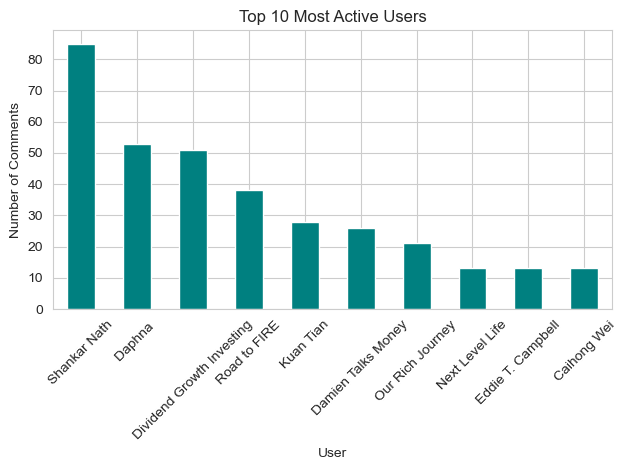

In [16]:
import matplotlib.pyplot as plt

top_users.plot(kind='bar', color='teal')
plt.title('Top 10 Most Active Users')
plt.xlabel('User')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
#Topic Modelling
df = pd.read_csv('cleaned_yt_data.csv')

!pip install gensim
!pip install wordcloud

In [18]:
import gensim
from gensim import corpora
from gensim.models import TfidfModel

texts = [text.split() for text in df['Processed_Description'].dropna()]

# Create a dictionary from the data
dictionary = corpora.Dictionary(texts)

# Convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# Create an TF-IDF model
tfidf = TfidfModel(corpus)

# Convert corpus to TF-IDF representation
corpus_tfidf = tfidf[corpus]

# LDA topic modeling using TF-IDF corpus with only 5 topics
lda_model = gensim.models.LdaMulticore(corpus_tfidf, num_topics=5, id2word=dictionary, passes=15, workers=5)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.003*"news" + 0.003*"nbc" + 0.002*"millennials" + 0.002*"job" + 0.001*"behaviourally" + 0.001*"cardoso" + 0.001*"suggest" + 0.001*"half" + 0.001*"exhausted" + 0.001*"teixeira"
Topic: 1 
Words: 0.003*"cnbc" + 0.002*"step" + 0.002*"lacey" + 0.002*"ramsey" + 0.002*"cent" + 0.002*"two" + 0.002*"show" + 0.002*"que" + 0.002*"de" + 0.002*"year"
Topic: 2 
Words: 0.003*"course" + 0.002*"fire" + 0.002*"investing" + 0.002*"portugal" + 0.002*"investment" + 0.002*"explain" + 0.002*"stock" + 0.002*"link" + 0.002*"richard" + 0.002*"money"
Topic: 3 
Words: 0.002*"interview" + 0.002*"coding" + 0.002*"dividend" + 0.001*"fat" + 0.001*"path" + 0.001*"individual" + 0.001*"techlead" + 0.001*"training" + 0.001*"engineer" + 0.001*"party"
Topic: 4 
Words: 0.003*"cnbc" + 0.002*"dianne" + 0.002*"guillermo" + 0.002*"level" + 0.001*"stage" + 0.001*"fi" + 0.001*"long" + 0.001*"find" + 0.001*"entire" + 0.001*"consistently"


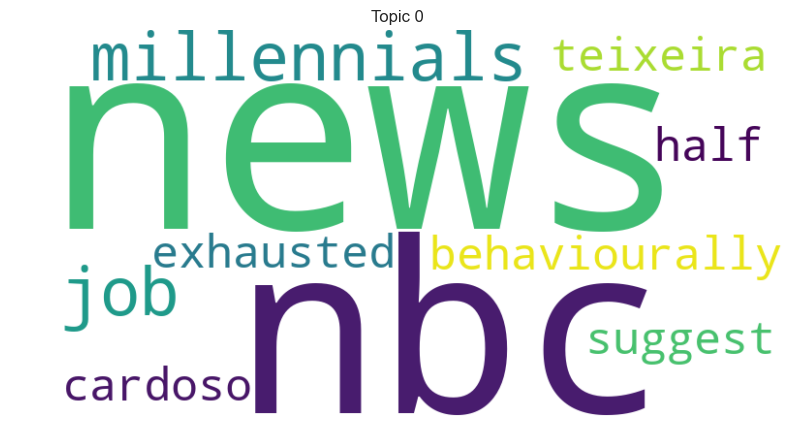

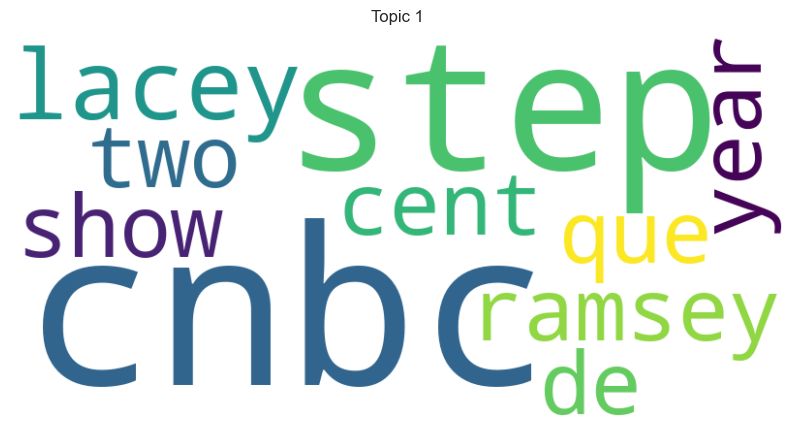

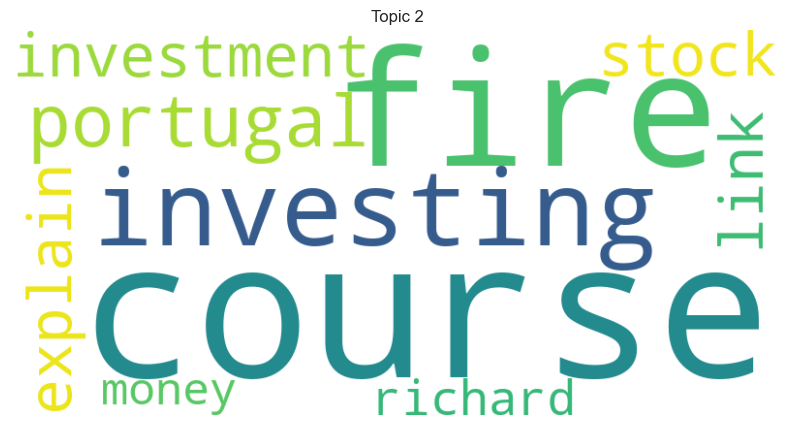

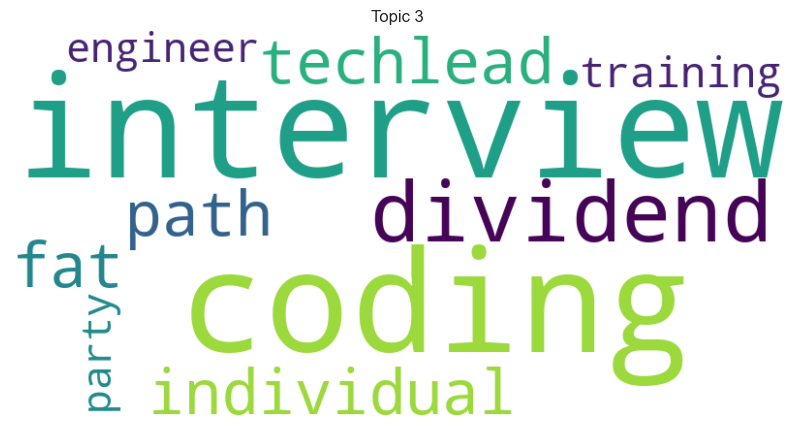

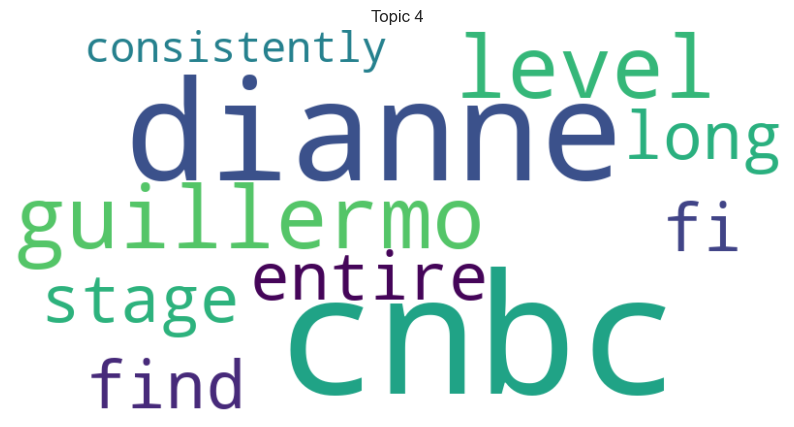

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate and plot the word cloud for each topic
for idx, topic in lda_model.print_topics(-1):
    plt.figure(figsize=(10, 8))
    
    # Extract words and their weights from each topic
    words = [word.split('*')[1].replace('"', '').strip() for word in topic.split('+')]
    weights = [float(word.split('*')[0].strip()) for word in topic.split('+')]
    
    # Create a dictionary with words as keys and weights as values
    word_freq = dict(zip(words, weights))
    
    # Generate word cloud
    wordcloud = WordCloud(background_color='white', max_words=10, width=800, height=400).generate_from_frequencies(word_freq)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {idx}')
    plt.axis('off')
    plt.show()

In [20]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [21]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Prepare LDA visualization data
vis_data = gensimvis.prepare(lda_model, corpus_tfidf, dictionary)

# Display the visualization
pyLDAvis.display(vis_data)